# Hello, Fashion!
The follow up to MNIST digits: classifying images of clothing.

## Importing Packages

In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np

# Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sn    # Heatmap for confusion matrix

## Importing Data

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

### Load Training and Testing Sets

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the Data

(60000, 28, 28)
0
255


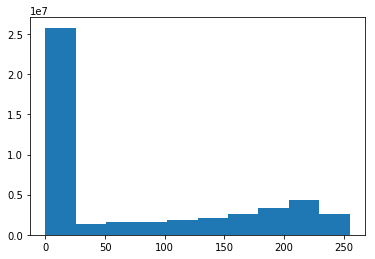

Ankle boot


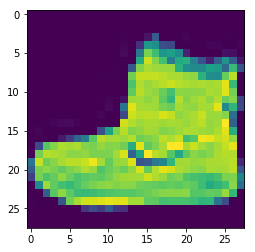

(10000, 28, 28)
0
255


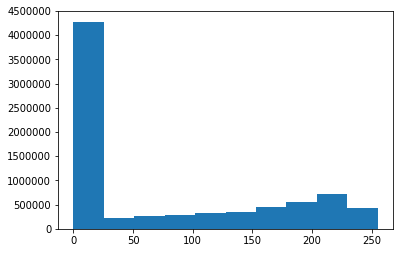

Ankle boot


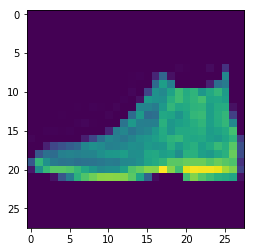

In [25]:
print( train_images.shape )
print( np.min( train_images ) )
print( np.max( train_images ) )

_ = plt.hist(train_images.ravel())
plt.show()
%matplotlib inline 
plt.imshow(train_images[0,:,:], interpolation='nearest')
print( class_names[train_labels[0]] )
plt.show()

print( test_images.shape )
print( np.min( test_images ) )
print( np.max( test_images ) )

_ = plt.hist(test_images.ravel())
plt.show()
%matplotlib inline 
plt.imshow(test_images[0,:,:], interpolation='nearest')
print( class_names[test_labels[0]] )
plt.show()

### Normalize Data

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build Model

In [27]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),    # Flatten input from 28x28 images to single column
            keras.layers.Dense(128, activation='relu'),    # First hidden layer of 128 nodes
            keras.layers.Dropout(0.2),                     # Dropout regularization
            keras.layers.Dense(10, activation='softmax')]) # Output softmax layer

## Select Optimization Function

In [28]:
model.compile(optimizer='adam',                          # Optimizer favored over standard gradient decent
              loss='sparse_categorical_crossentropy',    # Standard loss for multiclass classification
              metrics=['accuracy'])                      # Typical metric for classification performance

## Train Model

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5334 - accuracy: 0.8110
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4009 - accuracy: 0.8534
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3663 - accuracy: 0.8662
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3466 - accuracy: 0.8727s - loss: 0.3469 - accuracy: 0.
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3290 - accuracy: 0.8799
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3171 - accuracy: 0.8831
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3073 - accuracy: 0.8856
Epoch 8/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3000 - accuracy: 0.8884
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2892 - accuracy: 0.8921
Epoch 

## Evaluate Model Performance on Test Set

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3349 - accuracy: 0.8820


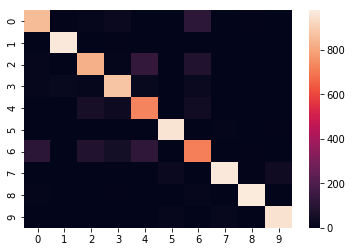

In [30]:
model.evaluate(test_images, test_labels)
confusion = tf.math.confusion_matrix( tf.argmax(input=model.predict(test_images), axis=1), test_labels )
sn.heatmap( confusion )